In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from scikitplot.metrics import plot_cumulative_gain

class_name = 'Occupancy'
df_training = pd.read_csv('training.csv', skipinitialspace=True, keep_default_na=True)

df_test = pd.read_csv('test.csv', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)

columns2remove = ['date', 'Unnamed: 0', 'cumulative_hour', 'cumulative_minute', 'day']
df_training.drop(columns2remove, inplace=True, axis=1)
df_test.drop(columns2remove, inplace=True, axis=1)


y_train = df_training[class_name]
y_test = df_test[class_name]
scaler = StandardScaler()

df_training.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour,minute,day_minute,weekend
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,19,859,0
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,20,860,0
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,21,861,0
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,22,862,0
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,23,863,0


Costruiamo un modello per ogni classificatore, con i parametri migliori trovati tramite grid search nei rispettivi notebook
La normalizzazione dei dati viene fatta sul posto

# Using 'Light'

## KNN

In [2]:
attr_knn = ['Temperature', 'Light', 'CO2']
X_train_knn = scaler.fit_transform(df_training[attr_knn].values)
X_test_knn = scaler.fit_transform(df_test[attr_knn].values)

clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')
clf_knn.fit(X_train_knn, y_train)
y_pred_knn = clf_knn.predict(X_test_knn)
y_score_knn = clf_knn.predict_proba(X_test_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.9891374837872893
F1-score [0.9933512  0.97034086]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5071
           1       0.94      1.00      0.97      1097

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



## Naive Bayes

In [3]:
attr_naive = ['Light', 'HumidityRatio']
X_train_naive = df_training[attr_naive].values
X_test_naive = df_test[attr_naive].values

clf_naive = GaussianNB()
clf_naive.fit(X_train_naive, y_train)
y_pred_naive = clf_naive.predict(X_test_naive)
y_score_naive = clf_naive.predict_proba(X_test_naive)

fpr_naive, tpr_naive, _ = roc_curve(y_test, y_score_naive[:, 1])
roc_auc_naive = auc(fpr_naive, tpr_naive)

print('Accuracy %s' % accuracy_score(y_test, y_pred_naive))
print('F1-score %s' % f1_score(y_test, y_pred_naive, average=None))
print(classification_report(y_test, y_pred_naive))

Accuracy 0.9810311284046692
F1-score [0.9883315  0.94932871]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5071
           1       0.90      1.00      0.95      1097

    accuracy                           0.98      6168
   macro avg       0.95      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



## Decision Tree

In [4]:
attr_dt = ['Light', 'CO2']
X_train_dt = scaler.fit_transform(df_training[attr_dt].values)
X_test_dt = scaler.fit_transform(df_test[attr_dt].values)

clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=20, min_samples_split=150,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')
clf_dt.fit(X_train_dt, y_train)
y_pred_dt = clf_dt.predict(X_test_dt)
y_score_dt = clf_dt.predict_proba(X_test_dt)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt))
print('F1-score %s' % f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.9969195849546044
F1-score [0.99812346 0.9914066 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5071
           1       0.98      1.00      0.99      1097

    accuracy                           1.00      6168
   macro avg       0.99      1.00      0.99      6168
weighted avg       1.00      1.00      1.00      6168



## Logistic Regression

In [5]:
X_train_log = df_training['Light']
X_test_log = df_test['Light']
clf_log = LogisticRegression(random_state=0)

clf_log.fit(X_train_log.values.reshape(-1,1), y_train)
y_pred_log = clf_log.predict(X_test_log.values.reshape(-1,1))
y_score_log = clf_log.predict_proba(X_test_log.values.reshape(-1,1))

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred_log))
print('F1-score %s' % f1_score(y_test, y_pred_log, average=None))
print(classification_report(y_test, y_pred_log))

Accuracy 0.9923800259403373
F1-score [0.995347   0.97897092]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5071
           1       0.96      1.00      0.98      1097

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



# ROC curve

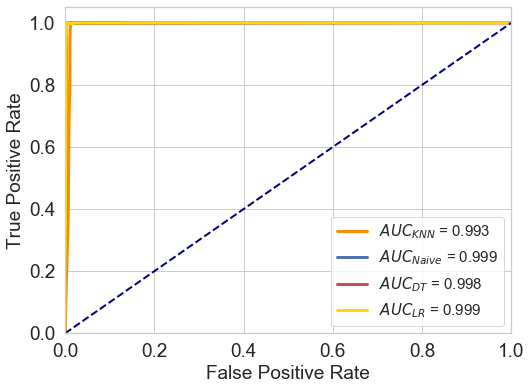

In [6]:
plt.figure(figsize = (8,6))
sns.set(style=('whitegrid'))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC_{KNN}$ = %.3f' % (roc_auc_knn))
plt.plot(fpr_naive, tpr_naive, color='b', lw=3, label='$AUC_{Naive}$ = %.3f' % (roc_auc_naive))
plt.plot(fpr_dt, tpr_dt, color='r', lw=3, label='$AUC_{DT}$ = %.3f' % (roc_auc_dt))
plt.plot(fpr_log, tpr_log, color='gold', lw=3, label='$AUC_{LR}$ = %.3f' % (roc_auc_log))
f=19
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=f)
plt.ylabel('True Positive Rate', fontsize=f)
plt.legend(loc="lower right", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=f)
plt.show()

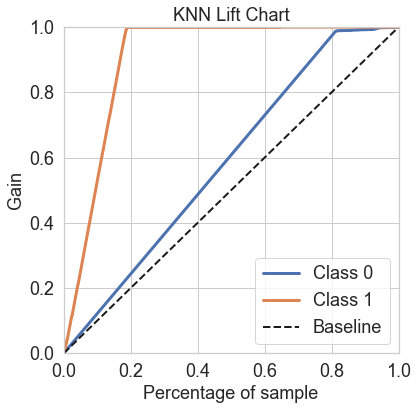

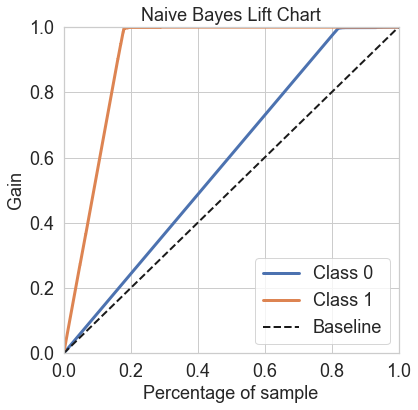

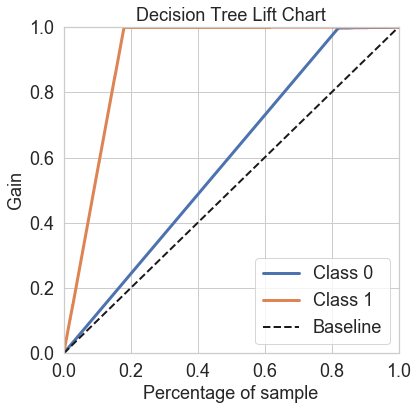

In [7]:
plot_cumulative_gain(y_test, y_score_knn, title = 'KNN Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_naive, title = 'Naive Bayes Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_dt, title = 'Decision Tree Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plt.show()

# Classifier withour Light

## KNN

In [8]:
attr_knn = ['Temperature', 'HumidityRatio']
X_train_knn = scaler.fit_transform(df_training[attr_knn].values)
X_test_knn = scaler.fit_transform(df_test[attr_knn].values)

clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
clf_knn.fit(X_train_knn, y_train)
y_pred_knn = clf_knn.predict(X_test_knn)
y_score_knn = clf_knn.predict_proba(X_test_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.9033722438391699
F1-score [0.93931989 0.76292761]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5071
           1       0.68      0.87      0.76      1097

    accuracy                           0.90      6168
   macro avg       0.82      0.89      0.85      6168
weighted avg       0.92      0.90      0.91      6168



## Naive Bayes

In [9]:
attr_naive = ['CO2', 'Humidity']
X_train_naive = df_training[attr_naive].values
X_test_naive = df_test[attr_naive].values

clf_naive = GaussianNB()
clf_naive.fit(X_train_naive, y_train)
y_pred_naive = clf_naive.predict(X_test_naive)
y_score_naive = clf_naive.predict_proba(X_test_naive)

fpr_naive, tpr_naive, _ = roc_curve(y_test, y_score_naive[:, 1])
roc_auc_naive = auc(fpr_naive, tpr_naive)

print('Accuracy %s' % accuracy_score(y_test, y_pred_naive))
print('F1-score %s' % f1_score(y_test, y_pred_naive, average=None))
print(classification_report(y_test, y_pred_naive))

Accuracy 0.7900453955901426
F1-score [0.85365578 0.62862059]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      5071
           1       0.46      1.00      0.63      1097

    accuracy                           0.79      6168
   macro avg       0.73      0.87      0.74      6168
weighted avg       0.90      0.79      0.81      6168



## Decision Tree

In [10]:
attr_dt = ['Temperature', 'HumidityRatio']
X_train_dt = scaler.fit_transform(df_training[attr_dt].values)
X_test_dt = scaler.fit_transform(df_test[attr_dt].values)

clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=65, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf_dt.fit(X_train_dt, y_train)
y_pred_dt = clf_dt.predict(X_test_dt)
y_score_dt = clf_dt.predict_proba(X_test_dt)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt))
print('F1-score %s' % f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.9096952010376135
F1-score [0.94318066 0.78010265]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5071
           1       0.69      0.90      0.78      1097

    accuracy                           0.91      6168
   macro avg       0.83      0.91      0.86      6168
weighted avg       0.93      0.91      0.91      6168



## Logistic Regression

In [11]:
X_train_log = df_training['CO2']
X_test_log = df_test['CO2']
clf_log = LogisticRegression(random_state=0)

clf_log.fit(X_train_log.values.reshape(-1,1), y_train)
y_pred_log = clf_log.predict(X_test_log.values.reshape(-1,1))
y_score_log = clf_log.predict_proba(X_test_log.values.reshape(-1,1))

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred_log))
print('F1-score %s' % f1_score(y_test, y_pred_log, average=None))
print(classification_report(y_test, y_pred_log))

Accuracy 0.7598897535667963
F1-score [0.82904306 0.59678737]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      5071
           1       0.43      1.00      0.60      1097

    accuracy                           0.76      6168
   macro avg       0.71      0.85      0.71      6168
weighted avg       0.90      0.76      0.79      6168



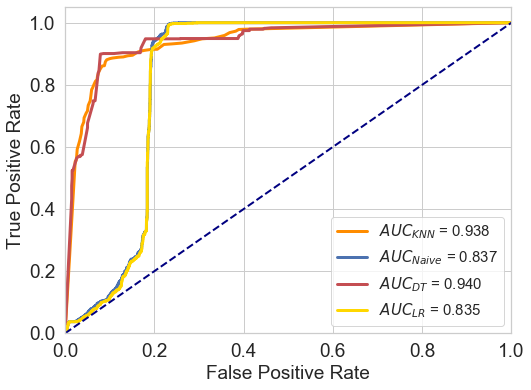

In [12]:
plt.figure(figsize = (8,6))
sns.set(style=('whitegrid'))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC_{KNN}$ = %.3f' % (roc_auc_knn))
plt.plot(fpr_naive, tpr_naive, color='b', lw=3, label='$AUC_{Naive}$ = %.3f' % (roc_auc_naive))
plt.plot(fpr_dt, tpr_dt, color='r', lw=3, label='$AUC_{DT}$ = %.3f' % (roc_auc_dt))
plt.plot(fpr_log, tpr_log, color='gold', lw=3, label='$AUC_{LR}$ = %.3f' % (roc_auc_log))
f=19
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=f)
plt.ylabel('True Positive Rate', fontsize=f)
plt.legend(loc="lower right", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=f)
plt.show()

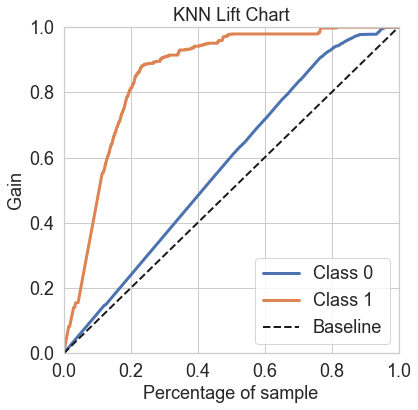

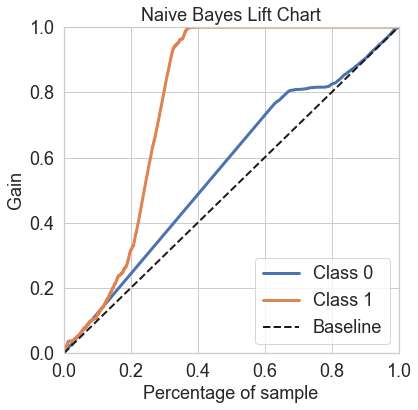

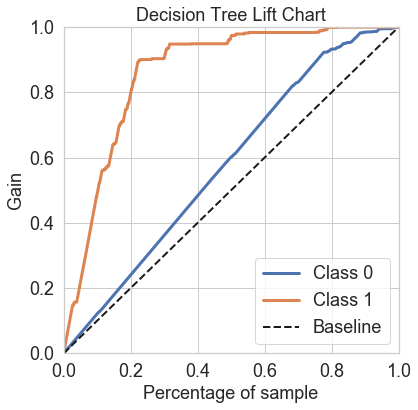

In [13]:
plot_cumulative_gain(y_test, y_score_knn, title = 'KNN Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_naive, title = 'Naive Bayes Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plot_cumulative_gain(y_test, y_score_dt, title = 'Decision Tree Lift Chart', figsize = (6,6), title_fontsize = 18, text_fontsize = 18)
plt.show()